dimension: (799, 26)
nombre de ligne: 799
nombre de colonne: 26
              age    n.enfant   n.fratrie   suicide.s  dur.interv
count  797.000000  773.000000  799.000000  758.000000  749.000000
mean    38.899624    1.755498    4.286608    0.794195   61.891856
std     13.280978    1.834044    3.441485    1.435488   19.669605
min     19.000000    0.000000    0.000000    0.000000    0.000000
25%     28.000000    0.000000    2.000000    0.000000   48.000000
50%     37.000000    1.000000    3.000000    0.000000   60.000000
75%     48.000000    3.000000    6.000000    1.000000   75.000000
max     83.000000   13.000000   21.000000    5.000000  120.000000
variance: age             176.384384
duree             0.753804
discip            0.178417
n.enfant          3.363716
n.fratrie        11.843818
ecole             0.955673
separation        0.244318
juge.enfant       0.200558
place             0.176530
abus              0.200871
grav.cons         2.726128
dep.cons          0.239639
ago.cons

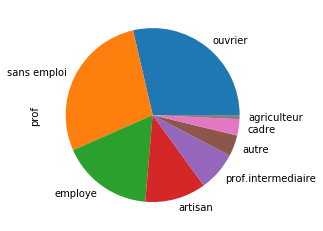

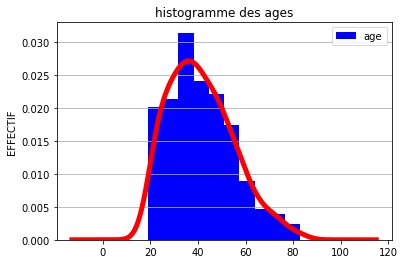

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#extraction des données avec pandas
donnee= pd.read_csv('smp.csv', delimiter=';')
liste_prisonniers=pd.DataFrame(donnee)

#affichage du nombre d'observations et du nombre de variable
print("dimension:",liste_prisonniers.shape)
print("nombre de ligne:",len(liste_prisonniers))
print("nombre de colonne:",len(liste_prisonniers.columns))

#Changement des types des variables avec la methode astype
liste_prisonniers['prof']=liste_prisonniers['prof'].astype('category')
liste_prisonniers['duree']=liste_prisonniers['duree'].astype('category')
liste_prisonniers['discip']=liste_prisonniers['discip'].astype('category')
liste_prisonniers['ecole']=liste_prisonniers['ecole'].astype('category')
liste_prisonniers['separation']=liste_prisonniers['separation'].astype('category')
liste_prisonniers['juge.enfant']=liste_prisonniers['juge.enfant'].astype('category')
liste_prisonniers['place']=liste_prisonniers['place'].astype('category')
liste_prisonniers['abus']=liste_prisonniers['abus'].astype('category')
liste_prisonniers['grav.cons']=liste_prisonniers['grav.cons'].astype('category')
liste_prisonniers['dep.cons']=liste_prisonniers['dep.cons'].astype('category')
liste_prisonniers['ago.cons']=liste_prisonniers['ago.cons'].astype('category')
liste_prisonniers['ptsd.cons']=liste_prisonniers['ptsd.cons'].astype('category')
liste_prisonniers['alc.cons']=liste_prisonniers['alc.cons'].astype('category')
liste_prisonniers['subst.cons']=liste_prisonniers['subst.cons'].astype('category')
liste_prisonniers['scz.cons']=liste_prisonniers['scz.cons'].astype('category')
liste_prisonniers['char']=liste_prisonniers['char'].astype('category')
liste_prisonniers['rs']=liste_prisonniers['rs'].astype('category')
liste_prisonniers['ed']=liste_prisonniers['ed'].astype('category')
liste_prisonniers['dr']=liste_prisonniers['dr'].astype('category')
liste_prisonniers['suicide.hr']=liste_prisonniers['suicide.hr'].astype('category')
liste_prisonniers['suicide.past']=liste_prisonniers['suicide.past'].astype('category')

#Affichage des type de variable
liste_prisonniers.dtypes
#Utilisation de la methode describe() qui fournie une statistique du DataFrame
print(liste_prisonniers.describe())

#la variance de tous les colonnes numeriques du DataFrame
print("variance:",liste_prisonniers.var())
#la variance de la colonne age
print("variance:",liste_prisonniers.age.var())

#construction de la boite a moustache pour les ages des prisonniers
#Mettre le pieplot en commentaire si vous voulez l'afficher
boxplot=liste_prisonniers.boxplot(column=['age'], vert = False)

#liste des prisonniers agriculteurs et ayant plus de deux enfants
print(liste_prisonniers.loc[(liste_prisonniers['prof']=="agriculteur") & (liste_prisonniers['n.enfant'] > 2),:])
#créons un dataframe a partir de la table des professions
fp=pd.DataFrame(liste_prisonniers['prof'])

#calcul des fréquences des modalités de la variable prof
#regroupement des modalités
g = liste_prisonniers.groupby('prof')
#cette methode donne les frequences par modalites.
print(liste_prisonniers.prof.value_counts('NaN'))

#pour avoir les frequences en pourcentage
x=pd.value_counts(liste_prisonniers['prof']) 
print(x)
dico=dict(x) # Transformer x en un dictionnaire 
print(dico) 
#Transformation du dictionnaire en dataframe 
col=dico.keys()  # récupérer les clés du dictionnaires (Ces clés représentent les modalités analysées. Elles seront les variables dans le dataframe à créer).
print(col) 
dfx = pd.DataFrame(dico,columns=col, index=[0]) # index=[0] doit être spécifié lorsque les valeurs du dictionnaire ne sont pas encadré par []. 
dfx['total']=dfx.sum(axis=1) 
for names, values in dfx.iteritems(): # on récupère le nom de la colonne et sa valeur     
    dfx['{name}'.format(name=names)] =100*dfx['{name}'.format(name=names)]/dfx['total'] # Calcul du pourcentage 
print(dfx) # on obtient ainsi le tableau de fréquence en pourcentage

#diagramme circulaire de la variable profession
resultat.plot.pie()

#les moyennes des âges par profession
print("moyenne des ages des ouvriers:",g.get_group('ouvrier')['age'].mean())
print("moyenne des ages des sans emploi:",g.get_group('sans emploi')['age'].mean())
print("moyenne des ages des employes:",g.get_group('employe')['age'].mean())
print("moyenne des ages des artisans:",g.get_group('artisan')['age'].mean())
print("moyenne des ages des proffessions intermediaires:",g.get_group('prof.intermediaire')['age'].mean())
print("moyenne des ages pour autres:",g.get_group('autre')['age'].mean())
print("moyenne des ages des cadres:",g.get_group('cadre')['age'].mean())
print("moyenne des ages des agriculteurs:",g.get_group('agriculteur')['age'].mean())

#affichage de la table des eﬀectifs pour les variables prof incluant les ”NaN”. 
print(liste_prisonniers.prof.value_counts())
#ce bout de code nous renvoi directement le nombre de NaN de la table prof
column_with_nan = fp.columns[fp.isnull().any()]
for column in column_with_nan:
       print(column, fp[column].isnull().sum())

#En faisant une boucle sur les colonne du DataFrame on a directement les totaux des valeures manquantes
column_with_nan = liste_prisonniers.columns[liste_prisonniers.isnull().any()]
for column in column_with_nan:
       print(column, liste_prisonniers[column].isnull().sum())

# Suppression de toutes les lignes contenant des ”Nan”.
index_with_nan = liste_prisonniers.index[liste_prisonniers.isnull().any(axis=1)]
liste_prisonniers.drop(index_with_nan,0, inplace=True)
#liste_prisonniers.dropna(axis=1) cette methode peut aussi etre utilisée

#histogramme et  densité de la variable age sur la même ﬁgure.
#definissons le dataframe de la variable age
ag=pd.DataFrame(liste_prisonniers['age'])
#construction du graphe
fig, ax = plt.subplots()
ag.plot.kde(ax=ax, legend=False, title='histogramme des ages', color='r', linewidth='5')
ag.plot.hist(density=True, ax=ax, color='blue')
ax.set_ylabel('EFFECTIF')
ax.grid(axis='y')
ax.set_facecolor('white')

#la taille et la liste des ages restantes
print(ag.shape)
print(ag)
print(ag.describe(include="all"))

#age_classe=[[min(age),Q1], ]Q1,Q2], ]Q2,Q3], ]Q3,max(age)]]
#Avec la methode qcut ceci est directement fait et inserer dans le dataframe
liste_prisonniers['age_classe'] = pd.qcut(ag['age'], q=4)   #decoupe la table age en quartile et insert la variable age_classe dans les données des prisonniers
print(liste_prisonniers['age_classe'])
#Affichons le tableau des données
liste_prisonniers.head()

# fréquences des modalités de la nouvelle variable age_classe.
print(liste_prisonniers.age_classe.value_counts('NaN'))